In [17]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
# from itertools import combinations
# from functools import reduce
import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

# run_analysis = False

data_samples = [
    'SingleElectron',
    'SingleMuon'
]

data_runs = ['B', 'C', 'D', 'E', 'F']

mc_samples_all = [
    'ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8',
    'THW_ctcvcp_5f_Hincl_13TeV_madgraph_pythia8',
    'ttHToNonbb_M125_TuneCP5_13TeV-powheg-pythia8',
    'TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8',
    'TTToHadronic_TuneCP5_13TeV-powheg-pythia8',
    'TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8',
    'TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8',
    'ST_s-channel_4f_leptonDecays_TuneCP5_PSweights_13TeV-amcatnlo-pythia8',
    'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_PSweights_13TeV-powheg-pythia8',
    'ST_tW_top_5f_inclusiveDecays_TuneCP5_PSweights_13TeV-powheg-pythia8',
    'ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8',
    'ST_t-channel_top_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8',
    'TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8',
    'TTWJetsToQQ_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8',
    'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WW_TuneCP5_13TeV-pythia8',
    'WZ_TuneCP5_13TeV-pythia8',
    'ZZ_TuneCP5_13TeV-pythia8'
]

mc_samples_to_sum = {
    'ttHTobb+THW' : [s for s in mc_samples_all if s.split('_')[0] in ['ttHTobb', 'THW']],
    'ST'          : [s for s in mc_samples_all if s.startswith('ST')],
    'VV'          : [s for s in mc_samples_all if s.split('_')[0] in ['WW', 'WZ', 'ZZ']]
}

mc_samples = [s for s in mc_samples_all if not s in sum(mc_samples_to_sum.values(),[])]
mc_samples += mc_samples_to_sum.keys()

In [2]:
def merge_json_output(samples):
    merge = {}
    for indx,s in enumerate(samples):
        with open(s) as json_file:
            data = json.load(json_file)
        
        for k1 in [k1 for k1 in data.keys() if not k1.startswith('hist_leading_jet')]:
            if indx == 0:
                merge[k1] = {}
            for k2 in data[k1].keys():
                if k2 == 'contents' and indx != 0:
                    merge[k1][k2] = [sum(x) for x in zip(merge[k1][k2], data[k1][k2])]
                else:
                    merge[k1][k2] = data[k1][k2]
    return merge

In [60]:
def load_data(folder):
    data = [os.path.join(folder, f'out_{s}_Run2017{r}.json') for s in data_samples for r in data_runs]
    data = merge_json_output(data)
    return data

def load_mc(folder,sum_all_bkgs=False):
    mc = {}
    for s in [s for s in mc_samples_all if not s in sum(mc_samples_to_sum.values(),[])]:
        with open( os.path.join(folder, f'out_{s}.json') ) as f:
            mc[s] = json.load(f)
    for s,s_to_sum in mc_samples_to_sum.items():
        s_to_sum = [os.path.join(folder, f'out_{s}.json') for s in s_to_sum]
        mc[s] = merge_json_output(s_to_sum)
    if sum_all_bkgs:
        s_to_sum = [os.path.join(folder, f'out_{s}.json') for s in mc_samples_all if not s.split('_')[0] in ['ttHTobb', 'THW']]
        mc['bkg'] = merge_json_output(s_to_sum)
    return mc

In [4]:
var_names = {
  'nleps'          : 'Number of leptons',
  'njets'          : 'Number of AK4 jets',
  'nfatjets'       : 'Number of AK8 jets',
  'met'            : 'met [GeV]',
#   'leading_jet_pt' : 'Leading AK4 jet pt [GeV]',
#   'leading_jet_eta': r'Leading AK4 jet $\eta$',
  'leadAK8JetMass' : 'Leading AK8 jet softdrop mass [GeV]',
  'leadAK8JetPt'   : 'Leading AK8 jet pt [GeV]',
  'leadAK8JetEta'  : r'Leading AK8 jet $\eta$',
  'leadAK8JetHbb'  : 'Leading AK8 jet bb tag score',
  'leadAK8JetTau21': r'Leading AK8 jet $\tau_{21}$',
  'lepton_pt'      : 'Lepton pt [GeV]',
  'lepton_eta'     : r'Lepton $\eta$',
  'hadWPt'         : 'Hadronic W pt [GeV]',
  'hadWEta'        : r'Hadronic W $\eta$',
  'hadWMass'       : 'Hadronic W mass [GeV]',
  'lepWPt'         : 'Leptonic W pt [GeV]',
  'lepWEta'        : r'Leptonic W $\eta$',
  'lepWMass'       : 'Leptonic W mass [GeV]',
  'deltaRlepWHiggs': r'$\Delta R(W_\mathrm{lep}, H)$',
  'deltaRhadWHiggs': r'$\Delta R(W_\mathrm{had}, H)$',
  'PV_npvsGood'    : 'Number of primary vertices',
  'pu_weights'     : 'PU weights'
}

sample_names = {                                  
#     'ST_s-channel_4f_leptonDecays_TuneCP5_PSweights_13TeV-amcatnlo-pythia8'           : 'ST_s-channel',
#     'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_PSweights_13TeV-powheg-pythia8'         : 'ST_tW_antitop',
#     'ST_tW_top_5f_inclusiveDecays_TuneCP5_PSweights_13TeV-powheg-pythia8'             : 'ST_tW_top',
#     'ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8'  : 'ST_t-channel_antitop',
#     'ST_t-channel_top_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8'      : 'ST_t-channel_top',
}

for s in mc_samples:
    if not s in sample_names:
        sample_names[s] = s.split('_')[0]

weights = ['', '_NoWeights']
masks   = [
    'basic',
    '2J',
    '2J2W',
    '2J2WdeltaR',
    '2J2WdeltaRTau21',
    '2J2WdeltaRTau21_Pass'
]

categories = [m+w for m in masks for w in weights]

###calculate sum of signal and background samples for a given variable
# var = 'best_higgs_candidate__msoftdrop'
# for cat in cats:
#         mc['hist_signal_'+cat+'_'+var] = {
#            'contents' : reduce(np.add, [np.array(mc[p]['contents']) for p in mc if 'H' in p.split('_')[1] and p.endswith('_'.join([cat,var]))]),
#            'contents_w2' : reduce(np.add, [np.array(mc[p]['contents_w2']) for p in mc if 'H' in p.split('_')[1] and p.endswith('_'.join([cat,var]))]),
#            'edges' : mc['hist_tt2b_boosted_HandW_deltaRcut_H_WhadResolved_best_higgs_candidate__msoftdrop']['edges']
#         }
#         mc['hist_background_'+cat+'_best_higgs_candidate__msoftdrop'] = {
#            'contents' : reduce(np.add, [np.array(mc[p]['contents']) for p in mc if (not 'H' in p.split('_')[1]) and (p.endswith('_'.join([cat,var]))) and (not 'WJ' in p) and (not 'signal' in p) and (not 'background' in p)]),
#            'contents_w2' : reduce(np.add, [np.array(mc[p]['contents_w2'])  for p in mc if (not 'H' in p.split('_')[1]) and (p.endswith('_'.join([cat,var]))) and (not 'WJ' in p) and (not 'signal' in p) and (not 'background' in p)]),
#            'edges' : mc['hist_tt2b_boosted_HandW_deltaRcut_H_WhadResolved_best_higgs_candidate__msoftdrop']['edges']
#         }

# colors = {
#     'ttlf': (251, 102, 102),
#     'ttcc': (204, 2, -0),
#     'ttb': (153, 51, 51),
#     'ttbb': (102, 0, 0),
#     'tt2b': (80, 0, 0),
#     'ttHTobb': (44, 62, 167),
#     'ttHToNonbb': (90, 115, 203),
# }

# for cn, c in colors.items():
#     colors[cn] = (c[0]/255.0, c[1]/255.0, c[2]/255.0)

In [12]:
##### order processes by number of events
def order_samples_and_cols(mc_samples, mc):
    mc_ordered = [
        'ttHTobb+THW'
    #     'ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8',
    #     'THW_ctcvcp_5f_Hincl_13TeV_madgraph_pythia8'
    ]
    _mc_samples = mc_samples.copy()
    _mc_samples.remove('ttHTobb+THW')

    integral = []
    for s in _mc_samples:
    #     if s.startswith('ttHTobb') or s.startswith('THW'):
    #         continue
        counts = mc[s]['hist_nleps_basic']['contents']
        integral.append( sum(counts) )

    for i in np.argsort(integral):
        mc_ordered.append(_mc_samples[i])

    #processes = processes_ordered
#     mc_samples = mc_ordered

    colmap = iter(plt.cm.terrain(np.linspace(.1,.85,len(_mc_samples))))

    color = {
        'ttHTobb+THW' : 'r'#plt.cm.terrain(0)
    }
    for s in mc_ordered[1:]:
        color[s] = next(colmap)
    return mc_ordered, color

In [68]:
def plot_mc(var, mc, bottom, fill, sample, rebin_factor, norm=False, ext_label=None, color_label=None):
    
    bins   = np.array(mc[sample][var]['edges'][:-1])
    counts = np.array(mc[sample][var]['contents'])
    yerr   = np.array(mc[sample][var]['contents_w2'])
    
    if color_label==None:
        color_label = sample
    
    if not rebin_factor==None:
        bins, counts, yerr = rebin(bins, counts, yerr, rebin_factor)
        
    integral = sum(counts)
    width    = np.diff(bins)[0]
    if norm:
        counts /= integral
    if ext_label:
        label  = ext_label
    else:
        label  = f'{sample_names[sample]} ({integral:.1f})'
    
    if fill:
        hist = plt.bar(bins, counts, width=width, bottom=bottom, align='edge', label=label, color=color[color_label], fill=fill, edgecolor=color[sample], zorder = 1)
    else:
        hist = plt.plot(bins, counts, '-', drawstyle='steps-post', label=label, color=color[color_label], zorder = 100)
#    hist = plt.step(bins, counts/integral, where='pre', label=name + ' ({0})'.format(round(integral, 1)), color=color[process], zorder = 1000)
    
#     if 'ttHTobb' in sample:
#         bins = mc[s][var]['edges'][1:]
#         hist = plt.step(bins, [c*50 for c in counts], label='tt+H(bb) x 50', color=color[sample], where='pre', zorder=1001)
        
    return counts, mc[sample][var]['edges'][::rebin_factor]

In [69]:
def plot_data(var, data, rebin_factor):
    
    bins   = np.array(data[var]['edges'][:-1])
    counts = np.array(data[var]['contents'])
    yerr   = np.array(data[var]['contents_w2'])
    
    if not rebin_factor==None:
        bins, counts, yerr = rebin(bins, counts, yerr, rebin_factor)
    
    integral = sum(counts)
    width    = np.diff(bins)[0]
    
    #bin_centers = [i+width/2. for i in data[var]['edges'][:]]  
    bin_centers = bins+width/2.

    #hist = plt.plot(bin_centers, counts+[0.], '-o', drawstyle='steps-mid', label=f'Data ({round(integral, 1)})', color='k', zorder = 1001)
    hist = plt.plot(bin_centers, counts, '-o', drawstyle='steps-mid', label=f'Data ({integral:.1f})', color='k', zorder = 1001)
    plt.xlim([data[var]['edges'][0], data[var]['edges'][-1]])
    #hist = plt.bar(bins, counts, yerr=yerr, width=width, align='center', label=dataset + ' ({0})'.format(round(integral, 2)))
        
    return counts

In [8]:
def rebin(bins, counts, yerr, rebin_factor):
    new_bins   = bins[::rebin_factor]
    new_counts = np.add.reduceat(counts, range(0, len(counts), rebin_factor))
    new_yerr   = np.add.reduceat(yerr, range(0, len(yerr), rebin_factor))
    return new_bins, new_counts, new_yerr

In [9]:
plot_params = {
    'nleps' : {
        'ymin'         : 1,
        'logy'         : True
    },
    'njets' : {
        'xlim'         : (0,15),
        'ymin'         : 1e-1,
        'logy'         : True
    },
    'nfatjets' : {
        'xlim'         : (0,6),
        'ymin'         : 1e-1,
        'logy'         : True
    },
    'met' : {
        'xlim'         : (0,800),
        'ymin'         : 1e-1,
        'rebin_factor' : 5,
        'logy'         : True
    },
    'leading_jet_pt' : {
        'ymin'         : 1e-1,
        'rebin_factor' : 5,
        'logy'         : True
    },
    'leading_jet_eta' : {
        'rebin_factor' : 2,
        'logy'         : True
    },
    'leadAK8JetMass' : {
        'xlim'         : (50,250),
        'ymin'         : 1e-1,
        'logy'         : True
    },
    'leadAK8JetPt' : {
        'xlim'         : (100,1500),
        'ymin'         : 1e-1,
        'rebin_factor' : 5,
        'logy'         : True
    },
    'leadAK8JetEta' : {
        'rebin_factor' : 2,
        'logy'         : True
    },
    'leadAK8JetHbb' : {
        'logy'         : True
    },
    'leadAK8JetTau21' : {
        'ymin'         : 1e-1,
        'rebin_factor' : 2,
        'logy'         : True
    },
    'lepton_pt' : {
        'xlim'         : (0,750),
        'ymin'         : 1e-2,
        'logy'         : True
    },
    'lepton_eta' : {
        'rebin_factor' : 2,
        'logy'         : True
    },
    'hadWPt' : {
        'logy'         : True
    },
    'hadWEta' : {
        'rebin_factor' : 2,
        'logy'         : True
    },
    'hadWMass' : {
        'logy'         : True
    },
    'lepWPt' : {
        'logy'         : True
    },
    'lepWEta' : {
        'rebin_factor' : 2,
        'logy'         : True
    },
    'lepWMass' : {
        'xlim'         : (60,300),
        'logy'         : True
    },
    'deltaRlepWHiggs' : {
        'ymin'         : 1e-1,
        'logy'         : True
    },
    'deltaRhadWHiggs' : {
        'ymin'         : 1e-1,
        'logy'         : True
    },
    'PV_npvsGood' : {
        'xlim'         : (0,70),
        'ymin'         : 1e-2,
        'rebin_factor' : 2,
        'logy'         : False
    }
}

In [10]:
def plot_histogram(var, cat, mc, data=None, fill_mc=True, rebin_factor=None):
    #matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    matplotlib.rc('text', usetex=False)
    
    fig = plt.figure(figsize=(6,6))
    
    # main plot
    bottom = None
    
    a1 = plt.axes([0.0,0.22,1.0,0.8])
    #a1.get_xaxis().set_visible(False)
    
    if var in plot_params and 'rebin_factor' in plot_params[var]:
        rebin_factor = plot_params[var]['rebin_factor']

    plt.grid(True, axis='y', zorder=0)
    
    if not data == None:
        counts_data = plot_data(f'hist_{var}_{cat}', data, rebin_factor)
        
    for s in mc_samples:
        if 'ttHTobb' in s:
            fill_mc = False
        else:
            fill_mc = True
        counts, bins = plot_mc(f'hist_{var}_{cat}', mc, bottom, fill_mc, s, rebin_factor)
        if mc_samples.index(s) in [1]:#, 2]:
            bottom = np.zeros_like(counts)
        if not bottom is None : bottom = [sum(x) for x in zip(bottom, counts)]
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

    binsize = np.diff( bins )[0]
    if '[GeV]' in var_names[var]:
        unit = r' GeV'
    else:
        unit = ''
    plt.ylabel(f'events / {binsize:.1f}{unit}', fontsize=18)
    plt.title(
        r'$\mathbf{CMS}$ simulation preliminary', fontsize=16, x=0.0, ha='left', y=1.03, va='top')
    ax = plt.gca()
    plt.text(0.99, 0.99,
        '2017 pp $41.5\ \mathrm{fb}^{-1}\ \mathrm{(13\ TeV)}$',
              fontsize=12, ha='right', va='bottom', transform=ax.transAxes)
    plt.xlabel(var_names[var], fontsize=18)
    
    if var in plot_params:
        if plot_params[var]['logy']: plt.yscale('log')
    
    if not data == None:
        # ratio plot
        a2 = plt.axes([0.0,0.0, 1.0, 0.18], sharex=a1)
        plt.xlabel(var_names[var], fontsize=18)
        plt.grid(True, axis='x', zorder=0)
        plt.ylabel(r'$\frac{\mathrm{data}}{\mathrm{pred.}}$', fontsize=16)
        plt.axhline(1.0, color='gray')
    
    
        ratio = [x/y if y > 0 else 1. for x, y in zip(counts_data, bottom)]# + [1.0]
        if len(bins) != len(ratio):
            ratio += [1.]
#         width = bins[1] - bins[0]
        plt.plot(bins, ratio, 'ko', drawstyle='steps-post', zorder = 1001)
    
        a2.set_ylim(0.5, 1.5)
        a2.set_xticks( a1.get_xticks() )
        a2.set_xlim( a1.get_xlim() )
    if var in plot_params:
        if 'xlim' in plot_params[var]:
            plt.xlim(plot_params[var]['xlim'])
        if (not 'NoWeights' in cat) and ('ymin' in plot_params[var]):
            a1.set_ylim(ymin=plot_params[var]['ymin'])
    outdir = os.path.join(plot_folder, cat)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    for ext in ['.png','.pdf']:
        plt.savefig(os.path.join(outdir,f'{var}_{cat}'+ext), bbox_inches='tight')
#     plt.show()
    plt.close()

In [43]:
folder = 'Wmass_60'#os.path.join('tests', 'fixPUweights_rerun')
result_folder = os.path.join('results', folder)
plot_folder   = os.path.join('plots', folder)

mc   = load_mc(result_folder)
# data = load_data(result_folder)
mc_samples, color = order_samples_and_cols(mc_samples, mc)

var_to_plot = 'leadAK8JetMass'#nleps'#
for var in var_names:
    if not var == var_to_plot:
        continue
    print(var)
#     try:
    for cat in categories:
#         if (var=='leadAK8JetMass' and 'Pass' in cat) or (var=='pu_weights' and not 'NoWeights' in cat):
#             continue
#         print(cat)
        if 'NoWeights' in cat:
            continue
            plot_histogram(var, cat, mc, data=None)
        else:
#             continue
            plot_histogram(var, cat, mc, data=None)
#     except:
#         print(f'Cannot find {var}')

leadAK8JetMass


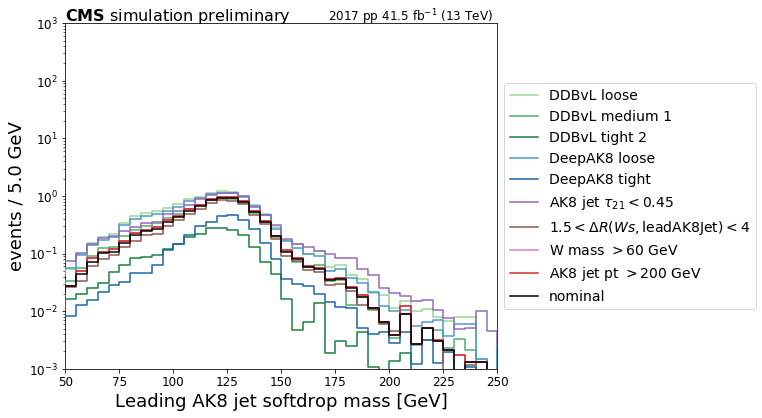

In [74]:
selection = {
    'DDBvL_07'     : 'DDBvL loose',
    'DDBvL_086'    : 'DDBvL medium 1',
#     'DDBvL_089'    : 'DDBvL medium 2',
#     'DDBvL_091'    : 'DDBvL tight 1',
    'DDBvL_092'    : 'DDBvL tight 2',
    'Hbb_06795'    : 'DeepAK8 loose',
    'Hbb_09805'    : 'DeepAK8 tight',
    'tau21_045'    : r'AK8 jet $\tau_{21} < 0.45$',
    'deltaR_tight' : r'$1.5 < \Delta R (Ws, \mathrm{leadAK8Jet}) < 4$',
    'Wmass_60'     : r'W mass $>60$ GeV',
    'AK8JetPt_200' : r'AK8 jet pt $>200$ GeV',
    'nominal'      : 'nominal',
}

color = {
    'nominal'      : 'k',
}

list_for_cols = [['AK8JetPt_200', 'tau21_045', 'deltaR_tight', 'Wmass_60'], [s for s in selection if s.startswith('Hbb')], [s for s in selection if s.startswith('DDBvL')]]
cm_list = [iter(plt.cm.tab10(np.linspace(0,1,11))[3:]), iter(plt.cm.Blues(np.linspace(.6,.8,len(list_for_cols[1])))), iter(plt.cm.Greens(np.linspace(.4,.8,len(list_for_cols[2]))))]

for s_list, cm in zip(list_for_cols, cm_list):
    for s in s_list:
        color[s] = next(cm)

fig = plt.figure(figsize=(6,6))

a1 = plt.axes([0.0,0.22,1.0,0.8])

bkg = False
if bkg:
    sample = 'bkg'
    outfile_append = 'bkg'
else:
    sample = 'ttHTobb+THW'
    outfile_append = 'signal'
var = 'leadAK8JetMass'
cat = '2J2WdeltaRTau21_Pass'
for sel, label in selection.items():
    mc = load_mc(os.path.join('results', sel),sum_all_bkgs=bkg)
    counts, bins = plot_mc(f'hist_{var}_{cat}', mc, None, False, sample, 1, norm=False, ext_label=label, color_label=sel)
if var in plot_params:
    if plot_params[var]['logy']: plt.yscale('log')
    if 'xlim' in plot_params[var]:
        plt.xlim(plot_params[var]['xlim'])
    a1.set_ylim(1e-3,1e3)
#     if (not 'NoWeights' in cat) and ('ymin' in plot_params[var]):
#         a1.set_ylim(ymin=plot_params[var]['ymin'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

binsize = np.diff( bins )[0]
if '[GeV]' in var_names[var]:
    unit = r' GeV'
else:
    unit = ''
plt.ylabel(f'events / {binsize:.1f}{unit}', fontsize=18)
plt.title(
    r'$\mathbf{CMS}$ simulation preliminary', fontsize=16, x=0.0, ha='left', y=1.03, va='top')
ax = plt.gca()
plt.text(0.99, 0.99,
    '2017 pp $41.5\ \mathrm{fb}^{-1}\ \mathrm{(13\ TeV)}$',
          fontsize=12, ha='right', va='bottom', transform=ax.transAxes)
plt.xlabel(var_names[var], fontsize=18)
for ext in ['.png','.pdf']:
        plt.savefig(os.path.join('plots',f'{var}_{cat}_compSelections_{outfile_append}'+ext), bbox_inches='tight')
plt.show()

In [ ]:
def plot_2d(data):#        var, data, name, bottom, process):
    
    extent = data['edges']
    counts = np.rot90(data['contents'])
        
    integral = sum(counts)
    
    plt.imshow(counts, extent=extent, vmin=0)
        
#     return plt.bar, counts, data[var]['edges']

In [ ]:
for sample in sample_list:
    print(sample)
    with open(os.path.join(mc_folder['DAK8'], 'out_'+sample+'.json')) as jsonfile:
        data = json.load(jsonfile)
    for hist2d in [hist for hist in data.keys() if hist.startswith('hist2d')]:
        plot_2d(data[hist2d])
        labels = hist2d.split('_')
        plt.xlabel(r'$\Delta R$({})'.format(labels[2]))
        plt.ylabel(r'$\Delta R$({})'.format(labels[3]))
        plt.colorbar()
        outdir = os.path.join('plots','1210','DDBvL','hist2d')
        if not os.path.exists(outdir):
            os.makedirs(outdir)
        for ext in ['.png','.pdf']:
            plt.savefig(os.path.join(outdir,sample+'_'+'deltaR_'+labels[2]+'_'+labels[3]+ext), bbox_inches='tight')
        plt.show()

In [ ]:
#### this cell is to compare a variable of the same for different cuts

def compare_histogram(var, mc, data, process='ttHTobb', fill_mc=False):
    #matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    matplotlib.rc('text', usetex=False)
    
    fig = plt.figure(figsize=(6,6))
    
    # main plot
    bottom = None
    
    a1 = plt.axes([0.0,0.22,1.0,0.8])
    #a1.get_xaxis().set_visible(False)

    plt.grid(True, axis='y', zorder=0)
    plt.plot([], [], ' ', label=process_names[process])
    #for cat in cats:
    cat = 'boosted_HandW'
    for name,dic in mc.items():
        _, counts, bins = plot_mc('hist_'+process+'_' + cat + '_' + var, dic, name, bottom, fill_mc, name) 
        #_, counts, bins = plot_mc('hist_'+process+'_' + cat + '_' + var, mc, cats_names[cat], bottom, fill_mc, cat) 

    if not data == None:
        _, counts_data = plot_data('hist_data_' + cat + '_' + var, data)
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    if var == 'njets':
        plt.xlim([0,14])
        plt.yscale('log')
        plt.ylim([1,10**8])
        
    if var == 'nbtags':
        plt.xlim([0,6])
        plt.yscale('log')
        plt.ylim([1,10**8])

    binsize = np.diff( bins )[0]
    plt.ylabel('a.u. / {:.1f} GeV'.format(binsize), fontsize=18)
    plt.title(
        r'$\mathbf{CMS}$ simulation preliminary',
        fontsize=16, x=0.0, ha='left', y=1.03, va='top')
    ax = plt.gca()
    plt.text(0.99, 0.99,
        '2017 pp $41.5\ \mathrm{fb}^{-1}\ \mathrm{(13\ TeV)}$',
              fontsize=12, ha='right', va='bottom', transform=ax.transAxes)
    if data == None:
        plt.xlabel(var_names[var], fontsize=18)
    
    if not data == None:
        # ratio plot
        a2 = plt.axes([0.0,0.0, 1.0, 0.18], sharex=a1)
        plt.xlabel(var_names[var], fontsize=18)
        plt.grid(True, axis='x', zorder=0)
        plt.ylabel(r'$\frac{\mathrm{data}}{\mathrm{pred.}}$', fontsize=16)
        plt.axhline(1.0, color='gray')
    
    
        ratio = [x/y if y > 0 else 1. for x, y in zip(counts_data, bottom)] + [1.0]
        width = bins[1] - bins[0]
        plt.plot(bins, ratio, 'k-', drawstyle='steps-post', zorder = 1001)
    
        a2.set_ylim(0.75, 1.25)
        ticks = a1.get_xticks()
        a2.set_xticks(ticks)
    outdir = os.path.join('plots','1114','bbtag_comparison')
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    for ext in ['.png','.pdf']:
        plt.savefig(os.path.join(outdir,process_names[process]+'_comparison_'+var+ext), bbox_inches='tight')
#        plt.yscale('log')
#        plt.savefig(os.path.join(outdir,var+'_semilogy'+ext), bbox_inches='tight')
    plt.show()

In [ ]:
for i,j in mc.items():
    print([k for k in j.keys() if 'signal' in k])

In [ ]:
for p in ['signal','background']: #processes:
    compare_histogram('best_higgs_candidate__msoftdrop', mc, None, process=p)

# Calculation of stat. only result

In [ ]:
def likelihood(mu, data_i, s_i, b_i):
    b_i[b_i < 0] = 0.0
    s_i[s_i < 0] = 0.0

    sel = ((s_i>0) & (b_i>0))
    
    ret = data_i[sel] * np.log(np.full(data_i[sel].shape[0], mu)*s_i[sel] + b_i[sel]) - (mu*s_i[sel] + b_i[sel])
    #ret = data_i * np.log(np.full(data_i.shape[0], mu)*s_i + b_i) - (mu*s_i + b_i)
    return -np.sum(ret)

In [ ]:
def make_fake_data(data, var, processes, cat):
    
    # calculate total MC prediction
    for p in processes:
        if processes.index(p) == 0:
            counts = data['hist_' + p + '_' + cat + '_' + var]['contents']
        else:
            counts = [x + y for x, y in zip(counts, data['hist_' + p + '_' + cat + '_' + var]['contents'])]
    
    return counts

In [ ]:
def stat_fit(data, var, processes, cat):
    
    fake_data = np.asarray(make_fake_data(data, var, processes, cat))
    sigs = ['ttHTobb', 'ttHToNonbb']
    for p in sigs:
        if sigs.index(p) == 0:
            sig_tot = data['hist_' + p + '_' + cat + '_' + var]['contents']
        else:
            sig_tot = [x + y for x, y in zip(sig_tot, data['hist_' + p + '_' + cat + '_' + var]['contents'])]
    sig = np.asarray(sig_tot)
    print(sig.shape)
    
    bkgs = ['ttlf', 'ttcc', 'ttb', 'tt2b', 'ttbb']
    for p in bkgs:
        if bkgs.index(p) == 0:
            bkg_tot = data['hist_' + p + '_' + cat + '_' + var]['contents']
        else:
            bkg_tot = [x + y for x, y in zip(bkg_tot, data['hist_' + p + '_' + cat + '_' + var]['contents'])]
    bkg_tot = np.asarray(bkg_tot)
    print(bkg_tot.shape)
    print(fake_data.shape)
    
    import scipy.optimize as optimize
    mu0 = 0.0
    res = optimize.minimize(likelihood, mu0, (fake_data, sig, bkg_tot), bounds = [(None,None)])

    # Error of estimator
    err = lambda mu: likelihood(mu, fake_data, sig, bkg_tot)-(likelihood(res.x, fake_data, sig, bkg_tot)+0.5)

    down = res.x - optimize.fsolve(err,(res.x - 3.0))[0]
    up = optimize.fsolve(err,(res.x + 0.01))[0] - res.x

    print('Best fit:', res.x[0], '-', down[0], '+', up[0])
    

In [ ]:
cat = 'sl_jge4_tge2'
stat_fit(mc, 'DNN_ROC', processes, cat)

# ROC curve

In [ ]:
def ROC(data, processes, cat, var):
    
    sigs = ['ttHTobb', 'ttHToNonbb']
    for p in sigs:
        if sigs.index(p) == 0:
            sig_tot = data['hist_' + p + '_' + cat + '_' + var]['contents']
        else:
            sig_tot = [x + y for x, y in zip(sig_tot, data['hist_' + p + '_' + cat + '_' + var]['contents'])]
    sig = np.asarray(sig_tot)
    
    bkgs = ['ttlf', 'ttcc', 'ttb', 'tt2b', 'ttbb']
    for p in bkgs:
        if bkgs.index(p) == 0:
            bkg_tot = data['hist_' + p + '_' + cat + '_' + var]['contents']
        else:
            bkg_tot = [x + y for x, y in zip(bkg_tot, data['hist_' + p + '_' + cat + '_' + var]['contents'])]
    bkg_tot = np.asarray(bkg_tot)
    
    nsig = sum(sig_tot)
    nbkg = sum(bkg_tot)
    bkg_tot = [x/nbkg for x in bkg_tot]
    sig_tot = [x/nsig for x in sig_tot]

    fpr = np.cumsum(bkg_tot)
    tpr = np.cumsum(sig_tot)
    
    from sklearn.metrics import auc
    roc_auc = auc(fpr, tpr, reorder=True)
    if roc_auc < 0.5:
        roc_auc = 1 - roc_auc
    
    fig = plt.figure(figsize=(6,6))
    plt.plot([0, 1], [0, 1], color='k', linestyle='--')
    plt.plot(tpr, fpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc='lower right', fontsize=16)
    
    return roc_auc
    

In [ ]:
cat = 'sl_jge6_tge3'
ROC(mc, processes, cat, 'DNN_ROC')

In [ ]:
roc = 0
for p in ['ttH', 'ttbb', 'tt2b', 'ttb', 'ttcc', 'ttlf']:
    roc += ROC(mc, processes, cat, 'DNN_ROC_' + p)
print(roc/6.)

# Plot confusion matrix

In [ ]:
def calculate_confusion_matrix(data, process):
    pred = []
    for true_p in ['ttHTobb', 'ttbb', 'tt2b','ttb', 'ttcc', 'ttlf']:
        ntot = sum(data['hist_' + true_p + '_' + cat + '_nleps']['contents'])
        for pred_p in ['ttH', 'ttbb', 'tt2b', 'ttb', 'ttcc', 'ttlf']:
            n_pred = sum(data['hist_' + true_p + '_' + cat + '_DNN_ROC_' + pred_p]['contents'])/ntot
            pred.append(n_pred)
                   
    confusion_matrix = np.asarray(pred)
    cm = confusion_matrix.reshape((6,6))   
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['ttHbb', 'ttbb', 'tt2b', 'ttb', 'ttcc', 'ttlf'], yticklabels=['ttHbb', 'ttbb', 'tt2b', 'ttb', 'ttcc', 'ttlf'],
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

In [ ]:
cat = 'sl_j4_tge3'
calculate_confusion_matrix(mc, processes)